# Introduction
In this task we will look at predicting house prices given square foot and number of bedrooms as features. For this purpose, we will use multi-variate linear regression. The base version of this notebook is a python implementation of Andrew's exercise.
## Introduction to data
The data consists of two features(square feet area of house and number of rooms) and the target is the price of the house.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
frame = pd.read_csv('ex1data2.txt',header=None)
X_orig = frame.values[:,:2]
y_orig = frame.values[:,-1]
m = len(y_orig)
print(X_orig[:5])
print(y_orig[:5])
print(m)

[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]]
[399900 329900 369000 232000 539900]
47


Since the features are of different ranges, let us normalize the features. Also let us add a X0 feature to the dataset with value 1. These will be used to make vector calculation simpler.

In [3]:
def feature_normalize(X):
    m = X.shape[0]
    n = X.shape[1]
    norm_X = np.zeros((m,n))
    mu = np.zeros(n)
    std_dev = np.zeros(n)
    for i in range(n):
        mu[i] = X[:,i].mean()
        std_dev[i] = X[:,i].std()
        norm_X[:,i] = (X[:,i]-mu[i])/std_dev[i]
    return (norm_X,mu,std_dev)
X,mu,sigma = feature_normalize(X_orig)
X = np.c_[np.ones(m),X]
print(X[:5,:])

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]


# Multivariate linear regression
First let us run gradient descent on this data and see how the program learns by plotting the cost as each step of descent progresses

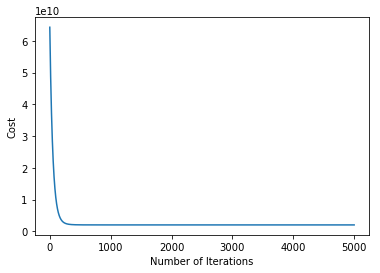

In [4]:
def compute_cost_multi(X,y,theta):
    m = len(y)
    return sum((np.dot(X,theta)-y)**2)/(2*m)
def gradient_descent_multi(X,y,theta,alpha,num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = theta - (alpha/m)*(np.dot(X.T,(np.dot(X,theta)-y)))
        J_history[i] = compute_cost_multi(X,y,theta)
    return (theta,J_history)
alpha = 0.01
num_iters = 5000
theta = np.zeros(X.shape[1])
theta,J_history = gradient_descent_multi(X,y_orig,theta,alpha,num_iters)
plt.plot(np.array(range(num_iters)),J_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

Let us predict the cost of a house that is 1650 sq feet with three rooms.

In [5]:
targetX = [1,(1650-mu[0])/sigma[0],(3-mu[1])/sigma[1]]
price = np.dot(targetX,theta)
print(price)

293081.464338


## Using the normal equation
Now instead of gradient descent, let us use normal equation to do the prediction.

In [6]:
import numpy.linalg
def lin_reg_normal_equation(X,y):
    return np.dot(numpy.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))
ntheta = lin_reg_normal_equation(X,y_orig)
nprice = np.dot(targetX,ntheta)
print(price)

293081.464338
